In [24]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
%autoreload 2

In [26]:
from helpers import *
from pynwb import NWBHDF5IO
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate
from scipy.io import loadmat, savemat
from math import floor, ceil

In [28]:
x1 = gen_plots()

---0.14713835716247559 seconds---
---0.1597440242767334 seconds---
---0.17416620254516602 seconds---
---0.15774083137512207 seconds---
---0.1666584014892578 seconds---
---0.16722798347473145 seconds---
---0.23560237884521484 seconds---
---0.16172385215759277 seconds---
---0.17249703407287598 seconds---
---0.15445303916931152 seconds---
---0.182936429977417 seconds---
---0.15704917907714844 seconds---
---0.17704081535339355 seconds---
---0.21433448791503906 seconds---
---0.6820034980773926 seconds---
---0.26486682891845703 seconds---
---0.20336151123046875 seconds---
---0.23064208030700684 seconds---
---0.24651479721069336 seconds---
---0.18353557586669922 seconds---
---0.1934070587158203 seconds---
---0.20035552978515625 seconds---
---0.2871851921081543 seconds---
---0.22369694709777832 seconds---
---0.2177877426147461 seconds---
---0.17313456535339355 seconds---
---0.2001643180847168 seconds---
---0.2066805362701416 seconds---
---0.17955493927001953 seconds---
---0.18401551246643066 s

In [33]:
print('%f +/- %f' % (np.mean(x1['aw_means']), np.std(x1['aw_means'])))
print('%f +/- %f' % (np.mean(x1['aw_max']), np.std(x1['aw_max'])))
print('%f +/- %f' % (np.mean(x1['aw_min']), np.std(x1['aw_min'])))
print('%f +/- %f' % (np.mean(x1['sdw_means']), np.std(x1['sdw_means'])))
print('%f +/- %f' % (np.mean(x1['sdw_max']), np.std(x1['sdw_max'])))
print('%f +/- %f' % (np.mean(x1['sdw_min']), np.std(x1['sdw_min'])))

23.670101 +/- 2.115152
90.289062 +/- 12.164981
12.789062 +/- 0.444627
2.568776 +/- 0.410606
3.671875 +/- 0.811147
1.992188 +/- 0.088042


In [34]:
print('%f +/- %f' % (np.mean(x2['aw_means']), np.std(x2['aw_means'])))
print('%f +/- %f' % (np.mean(x2['aw_max']), np.std(x2['aw_max'])))
print('%f +/- %f' % (np.mean(x2['aw_min']), np.std(x2['aw_min'])))
print('%f +/- %f' % (np.mean(x2['sdw_means']), np.std(x2['sdw_means'])))
print('%f +/- %f' % (np.mean(x2['sdw_max']), np.std(x2['sdw_max'])))
print('%f +/- %f' % (np.mean(x2['sdw_min']), np.std(x2['sdw_min'])))

42.403409 +/- 41.421218
280.742188 +/- 368.165495
15.375000 +/- 0.829156
2.614401 +/- 0.471057
2.687500 +/- 0.463512
2.382812 +/- 0.486073


In [31]:
x2 = gen_plots()

---0.4255707263946533 seconds---
---0.41236400604248047 seconds---
---0.4817380905151367 seconds---
---0.5133624076843262 seconds---
---0.5966920852661133 seconds---
---0.6085965633392334 seconds---
---0.6507575511932373 seconds---
---0.693413257598877 seconds---
---0.6085939407348633 seconds---
---0.5225164890289307 seconds---
---0.45122790336608887 seconds---
---0.45820045471191406 seconds---
---0.41416287422180176 seconds---
---0.4970054626464844 seconds---
---0.44791555404663086 seconds---
---0.4461183547973633 seconds---
---0.42659544944763184 seconds---
---0.4622039794921875 seconds---
---0.791210412979126 seconds---
---0.45969629287719727 seconds---
---0.45929932594299316 seconds---
---0.46384286880493164 seconds---
---0.5465660095214844 seconds---
---0.4558265209197998 seconds---
---0.46032190322875977 seconds---
---0.41413211822509766 seconds---
---0.4752013683319092 seconds---
---0.473569393157959 seconds---
---0.4865725040435791 seconds---
---0.5078809261322021 seconds---
--

In [16]:
e105 = x['data'][:, 104]

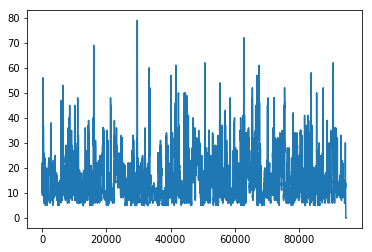

In [89]:
# Systematically compare the effect of changing window_size and slide_index
# For window_size = 200 and slide_index = 1 (calculating for every data point)
a1, s1 = autocorr_width(e105,200,1,mode = 'sliding')
plt.plot(a1)

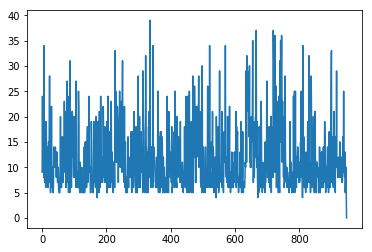

In [92]:
a2, s2 = autocorr_width(e105, 100, 100, mode = 'sliding')
plt.plot(a2)

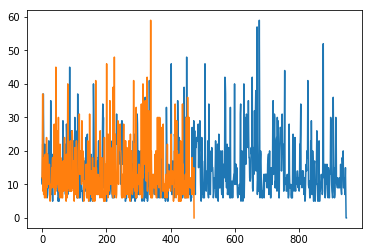

In [97]:
a3, s3 = autocorr_width(e105, 200, 100, mode = 'sliding')
a4, s4 = autocorr_width(e105, 200, 200, mode = 'sliding')
plt.plot(a3)
plt.plot(a4)

In [13]:
a5, s5, ad5 = autocorr_width(e105, 300, 300, mode = 'sliding')
a6, s6, ad6 = autocorr_width(e105, 3000, 300, mode = 'sliding')
a7, s7, ad7 = autocorr_width(e105, 6000, 300, mode = 'sliding')

In [40]:
a3, s3, sd3 = autocorr_width(e105, 600, 300, mode = 'sliding')

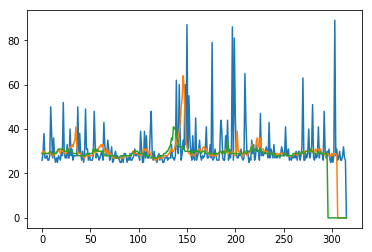

In [10]:
plt.plot(a5)
plt.plot(a6)
plt.plot(a7)

In [26]:
sd5 = np.diff(ad5_sh, 2)
sd6 = np.diff(ad6_sh, 2)
sd7 = np.diff(ad7_sh, 2)

2998

In [136]:
a9, s9, ad9 = autocorr_width(e105, 6000, 600, mode = 'sliding')
a10, s10, ad10 = autocorr_width(e105, 6000, 1300, mode = 'sliding')
a11, s11, ad11 = autocorr_width(e105, 6000, 2100, mode = 'sliding')

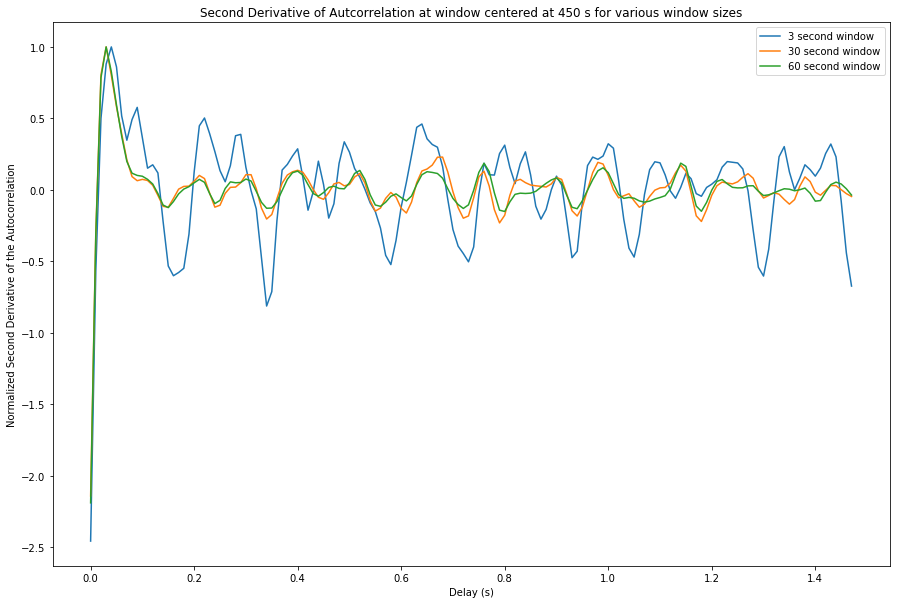

In [45]:
fig = plt.figure(figsize = (15, 10))
a = fig.add_subplot(111)

ad5_sh = ad5[floor(len(ad5)/2):]
ad6_sh = ad6[floor(len(ad6)/2):]
ad7_sh = ad7[floor(len(ad7)/2):]

sd5 = np.diff(ad5_sh, 2)
sd6 = np.diff(ad6_sh, 2)
sd7 = np.diff(ad7_sh, 2)


#plt.plot(ad5_sh/max(ad5_sh))
#plt.plot(ad6_sh[0:len(ad5_sh)]/max(ad6_sh))
#plt.plot(ad7_sh[0:len(ad5_sh)]/max(ad7_sh))

plt.plot(sd5/np.max(sd5))
plt.plot(sd6[0:len(sd5)]/np.max(sd6))
plt.plot(sd7[0:len(sd5)]/np.max(sd7))

ticks = a.get_xticks().tolist()
ticks[:] = [t/100 for t in ticks]
a.set_xticklabels(ticks)

plt.title('Second Derivative of Autcorrelation at window centered at 450 s for various window sizes')
plt.ylabel('Normalized Second Derivative of the Autocorrelation')
plt.xlabel('Delay (s)')
a.legend(['3 second window', '30 second window', '60 second window'])
plt.savefig('Figures/092418/autocorrsd_raw_windowsize.png')

In [19]:
# Vary the various parameters of the averaging process
a1, ad1 = autocorr_width(e105, 300, 300, 50, 0.005, mode = 'sliding')
a2, ad2 = autocorr_width(e105, 3000, 300, 50, 0.005, mode = 'sliding')
a3, ad3 = autocorr_width(e105, 6000, 300, 50, 0.005, mode = 'sliding')
'''
a4 = autocorr_width(e105, 300, 300, 100, 0.005, mode = 'sliding')
a5 = autocorr_width(e105, 3000, 300, 100, 0.005, mode = 'sliding')
a6 = autocorr_width(e105, 6000, 300, 100, 0.005, mode = 'sliding')

a7 = autocorr_width(e105, 300, 300, 50, 0.001, mode = 'sliding')
a8 = autocorr_width(e105, 3000, 300, 50, 0.001, mode = 'sliding')
a9 = autocorr_width(e105, 6000, 300, 50, 0.001, mode = 'sliding')
'''

"\na4 = autocorr_width(e105, 300, 300, 100, 0.005, mode = 'sliding')\na5 = autocorr_width(e105, 3000, 300, 100, 0.005, mode = 'sliding')\na6 = autocorr_width(e105, 6000, 300, 100, 0.005, mode = 'sliding')\n\na7 = autocorr_width(e105, 300, 300, 50, 0.001, mode = 'sliding')\na8 = autocorr_width(e105, 3000, 300, 50, 0.001, mode = 'sliding')\na9 = autocorr_width(e105, 6000, 300, 50, 0.001, mode = 'sliding')\n"

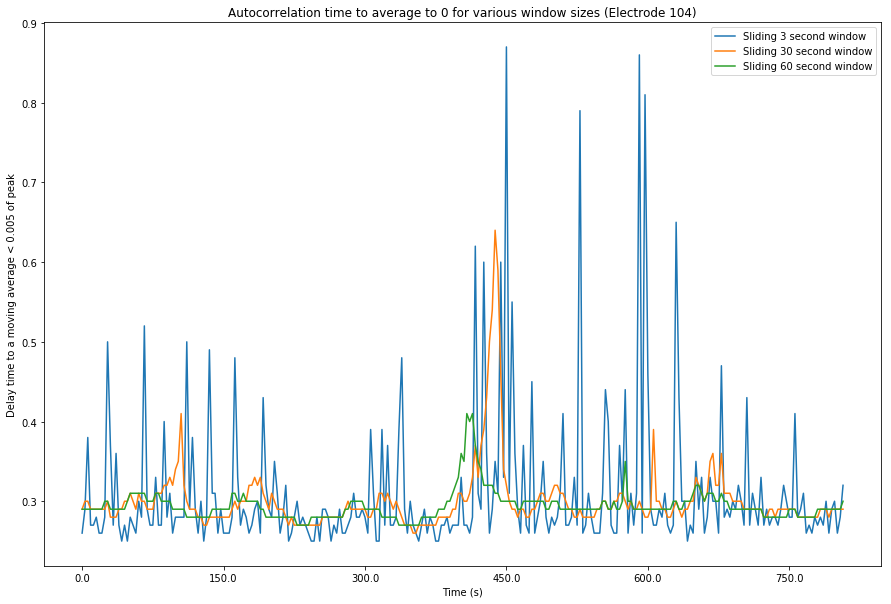

In [35]:
fig = plt.figure(figsize = (15, 10))
a = fig.add_subplot(111)

plt.plot(a1[0:270])
plt.plot(a2[0:270])
plt.plot(a3[0:270])

plt.title('Autocorrelation time to average to 0 for various window sizes (Electrode 104)')
plt.ylabel('Delay time to a moving average < 0.005 of peak')
plt.xlabel('Time (s)')

yticks = a.get_yticks().tolist()
yticks[:] = [t/100 for t in yticks]
a.set_yticklabels(yticks)

xticks = a.get_xticks().tolist()
xticks[:] = [t * 3 for t in xticks]
a.set_xticklabels(xticks)

a.legend(['Sliding 3 second window', 'Sliding 30 second window', 'Sliding 60 second window'])

# a = fig.add_subplot(312)

# plt.plot(a4[0:270])
# plt.plot(a5[0:270])
# plt.plot(a6[0:270])

# plt.title('Autocorrelation first zero delay for various window sizes')
# plt.ylabel('Delay time to first zero')
# plt.xlabel('Time (s)')

# yticks = a.get_yticks().tolist()
# yticks[:] = [t/100 for t in yticks]
# a.set_yticklabels(yticks)

# xticks = a.get_xticks().tolist()
# xticks[:] = [t * 3 for t in xticks]
# a.set_xticklabels(xticks)

# a.legend(['Sliding 3 second window', 'Sliding 30 second window', 'Sliding 60 second window'])

# a = fig.add_subplot(313)

# plt.plot(a7[0:270])
# plt.plot(a8[0:270])
# plt.plot(a9[0:270])

# plt.title('Autocorrelation first zero delay for various window sizes')
# plt.ylabel('Delay time to first zero')
# plt.xlabel('Time (s)')

# yticks = a.get_yticks().tolist()
# yticks[:] = [t/100 for t in yticks]
# a.set_yticklabels(yticks)

# xticks = a.get_xticks().tolist()
# xticks[:] = [t * 3 for t in xticks]
# a.set_xticklabels(xticks)

# a.legend(['Sliding 3 second window', 'Sliding 30 second window', 'Sliding 60 second window'])


plt.savefig('Figures/092418/autocorr_width_windowsize.png')

In [60]:
np.argmax(a1)

34

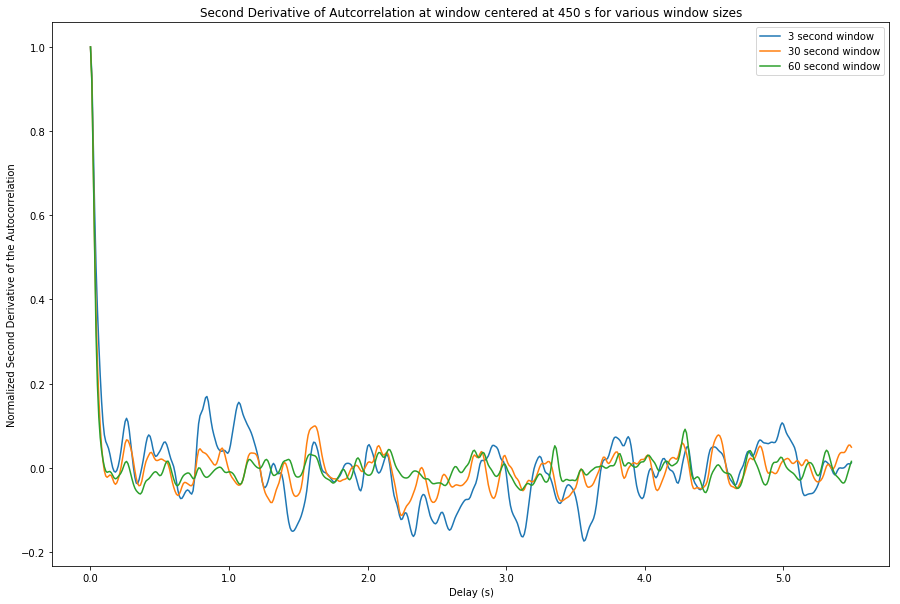

In [64]:
fig = plt.figure(figsize = (15, 10))
a = fig.add_subplot(111)

ad5_sh = ad1[floor(len(ad1)/2):]
ad6_sh = ad2[floor(len(ad2)/2):]
ad7_sh = ad3[floor(len(ad3)/2):]

sd5 = np.diff(ad5_sh, 2)
sd6 = np.diff(ad6_sh, 2)
sd7 = np.diff(ad7_sh, 2)


plt.plot(ad5_sh/max(ad5_sh))
plt.plot(ad6_sh[0:len(ad5_sh)]/max(ad6_sh))
plt.plot(ad7_sh[0:len(ad5_sh)]/max(ad7_sh))

# plt.plot(sd5/np.max(sd5))
# plt.plot(sd6[0:len(sd5)]/np.max(sd6))
# plt.plot(sd7[0:len(sd5)]/np.max(sd7))

ticks = a.get_xticks().tolist()
ticks[:] = [t/100 for t in ticks]
a.set_xticklabels(ticks)

plt.title('Second Derivative of Autcorrelation at window centered at 450 s for various window sizes')
plt.ylabel('Normalized Second Derivative of the Autocorrelation')
plt.xlabel('Delay (s)')
a.legend(['3 second window', '30 second window', '60 second window'])


In [123]:
x = np.linspace(0, 1000, 1000)


In [124]:
y = np.sin(x)
y2 = np.sin(10*x)
y3 = np.sin(5 * x)

In [125]:
sine_corr = np.correlate(y + y2 + y3, y + y2 + y3, mode = 'same')

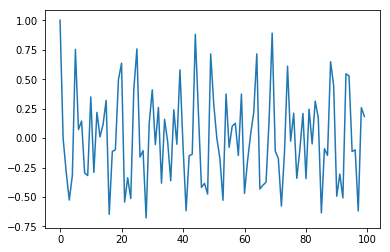

In [128]:
plt.plot(sine_corr[floor(len(sine_corr)/2):floor(len(sine_corr)/2) + 100]/np.max(sine_corr))

In [154]:
psd5 = np.fft.fft(ad5_sh)
psd6 = np.fft.fft(ad6_sh[0:len(ad5_sh)])
psd7 = np.fft.fft(ad7_sh[0:len(ad5_sh)])

c:\users\ankit\miniconda3\lib\site-packages\numpy\core\numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


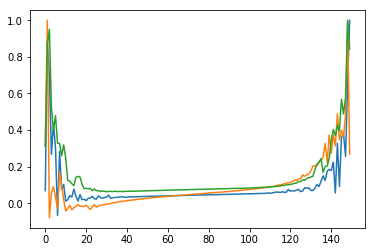

In [156]:
plt.plot(psd5/max(psd5))
plt.plot(psd6/max(psd6))
plt.plot(psd7/max(psd7))

In [ ]:
b1, s1, bd1 = autocorr_width(e105, 300, 1, mode = 'sliding')
b2, s2, bd2 = autocorr_width(e105, 3000, 1, mode = 'sliding')
b3, s3, bd3 = autocorr_width(e105, 6000, 1, mode = 'sliding')

In [10]:
b1, s1, bd1 = autocorr_width(e105, 3000, 3, mode = 'sliding')

[autoreload of helpers failed: Traceback (most recent call last):
  File "c:\users\ankit\miniconda3\lib\site-packages\IPython\extensions\autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "c:\users\ankit\miniconda3\lib\site-packages\IPython\extensions\autoreload.py", line 368, in superreload
    module = reload(module)
  File "c:\users\ankit\miniconda3\lib\imp.py", line 315, in reload
    return importlib.reload(module)
  File "c:\users\ankit\miniconda3\lib\importlib\__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 674, in exec_module
  File "<frozen importlib._bootstrap_external>", line 781, in get_code
  File "<frozen importlib._bootstrap_external>", line 741, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "C:\Users\Ankit\odrive\Berkeley Google Drive\bouchard\he

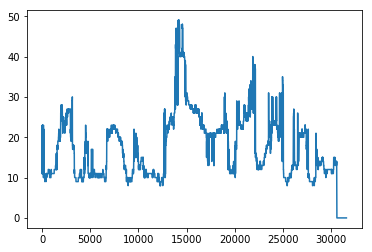

In [11]:
plt.plot(b1)

In [12]:
b2, s2, bd2 = autocorr_width(e105, 300, 1, mode = 'sliding')

In [ ]:
b3, s3, bd3 = autocorr_width(e105, 3000, 300, mode = 'sliding')

> c:\users\ankit\odrive\berkeley google drive\bouchard\helpers.py(166)autocorr_width()
-> average_window = window_length/10
(Pdb) next
> c:\users\ankit\odrive\berkeley google drive\bouchard\helpers.py(167)autocorr_width()
-> averages = moving_average(autocorr, average_window)
(Pdb) next
TypeError: slice indices must be integers or None or have an __index__ method
> c:\users\ankit\odrive\berkeley google drive\bouchard\helpers.py(167)autocorr_width()
-> averages = moving_average(autocorr, average_window)
(Pdb) average_window
300.0
(Pdb) quit()
> c:\users\ankit\odrive\berkeley google drive\bouchard\helpers.py(165)autocorr_width()
-> pdb.set_trace()
(Pdb) quit()
> c:\users\ankit\odrive\berkeley google drive\bouchard\helpers.py(166)autocorr_width()
-> average_window = floor(window_length/10)
(Pdb) quit()
> c:\users\ankit\odrive\berkeley google drive\bouchard\helpers.py(165)autocorr_width()
-> pdb.set_trace()
(Pdb) quit()
> c:\users\ankit\odrive\berkeley google drive\bouchard\helpers.py(166)

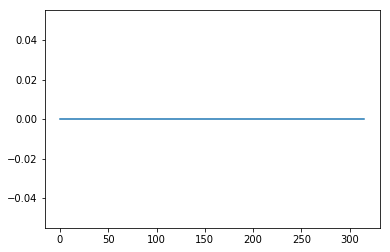

In [7]:
plt.plot(b3)

In [19]:
x = np.arange(10) * 2
x

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [34]:
x

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [36]:
moving_average(x, 5)

array([ 4.,  6.,  8., 10., 12., 14.])

In [32]:
x.size

10

In [33]:
np.cumsum(x).size

10

FileNotFoundError: [Errno 2] No such file or directory: 'Figures/092418/batch/ac/0.png'

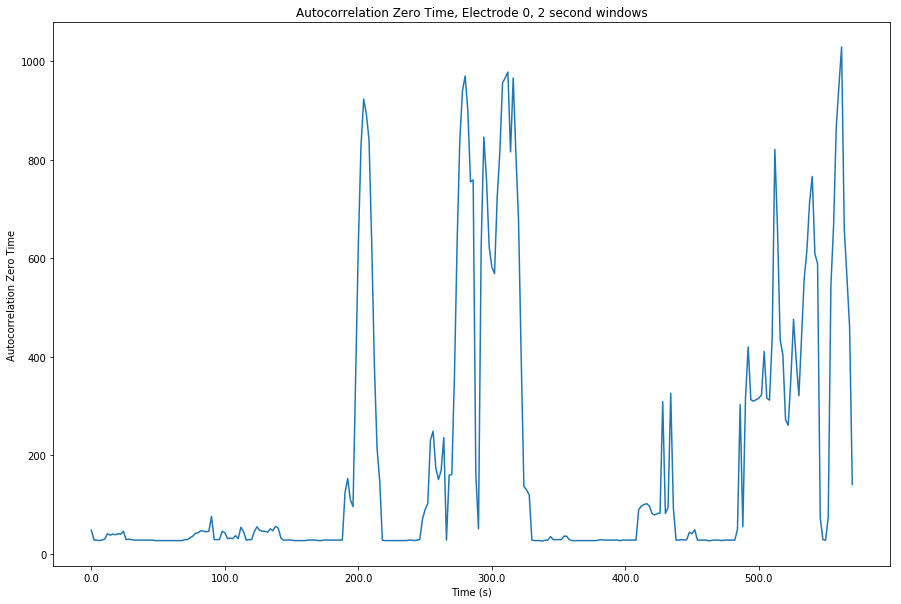

In [4]:
gen_plots()